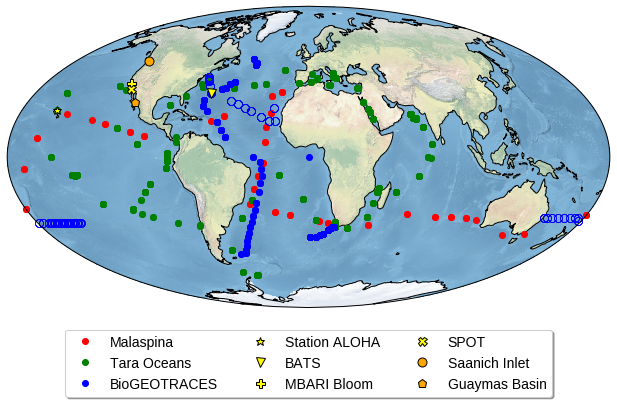

In [204]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import csv
import cartopy.crs as ccrs

# setting parameters for title and axes
font = {'family':'sans-serif',
        'sans-serif':['Liberation Sans'], 'size' : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(12,7))
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.stock_img()
#plt.title("Distribution of Metagenomic Datasets Used for Primer Evaluation")
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                  linewidth=1, color='gray', alpha=0.5, linestyle='-')

with open('Malaspina-media-5.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        lat = float(data['Latitude'])
        lon = float(data['Longitude'])
        x,y = lon,lat
        plt.plot(x,y,marker='o',markersize=6, color="red", transform=ccrs.PlateCarree(), linestyle="None")
    plt.plot(x,y,marker='o',markersize=6, color="red", label="Malaspina", transform=ccrs.PlateCarree(), linestyle="None")
    
with open('TARAlt3uM_MGPrimerEval_samples.grepped.header-added.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        #names.append(data['Sample ID (TARA_barcode#, registered at ...)'])
        lat = float(data['Latitude'])
        lon = float(data['Longitude'])
        x,y = lon,lat
        plt.plot(x,y,marker='o',markersize=6, color="green", transform=ccrs.PlateCarree(), linestyle="None")
    plt.plot(x,y,marker='o',markersize=6, color="green", label="Tara Oceans", transform=ccrs.PlateCarree(), linestyle="None")
        
with open('Table_3_bioGEOTRACES.sorted.clean.metadata-GA03-GP13.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        lat = float(data['Latitude [degrees_north]'])
        lon = float(data['Longitude [degrees_east]'])
        x,y = lon,lat
        plt.plot(x,y,marker='o',markersize=8, markerfacecolor='none', markeredgecolor="blue", markeredgewidth=0.5, transform=ccrs.PlateCarree(), linestyle="None")
    #plt.plot(x,y,marker='o',markersize=6, color="blue", label="BioGEOTRACES", linestyle="None", mec="black")
    
with open('Table_3_bioGEOTRACES.sorted.clean.metadata-others.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        lat = float(data['Latitude [degrees_north]'])
        lon = float(data['Longitude [degrees_east]'])
        x,y = lon,lat
        plt.plot(x,y,marker='o',markersize=6, color="blue", transform=ccrs.PlateCarree(), linestyle="None")
    plt.plot(x,y,marker='o',markersize=6, color="blue", label="BioGEOTRACES", linestyle="None")
        
lat = float("22.75")
lon = float("202")
x,y = lon,lat
plt.plot(x,y,marker='*',markersize=9, label="Station ALOHA", transform=ccrs.PlateCarree(), linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)

lat = float("31.666667")
lon = float(360-64.166667)
x,y = lon,lat
plt.plot(x,y,marker='v',markersize=9, label="BATS", transform=ccrs.PlateCarree(), linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)

lat = float("36.835")
lon = float(360-121.901)
x,y = lon,lat
plt.plot(x,y,marker='P',markersize=9, label="MBARI Bloom", transform=ccrs.PlateCarree(), linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)
lat = float("33.55")
lon = float(360-118.4)
x,y = lon,lat
plt.plot(x,y,marker='X',markersize=9, label="SPOT", transform=ccrs.PlateCarree(), linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)

lat = float("48.6488")
lon = float(360-123.5043)
x,y = lon,lat
plt.plot(x,y,marker='o',markersize=9, label="Saanich Inlet", transform=ccrs.PlateCarree(), linestyle="None", markerfacecolor='orange', markeredgecolor="black", markeredgewidth=1.0)

lat = float("27")
lon = float(360-111.415556)
x,y = lon,lat
plt.plot(x,y,marker='p',markersize=9, label="Guaymas Basin", transform=ccrs.PlateCarree(), linestyle="None", markerfacecolor='orange', markeredgecolor="black", markeredgewidth=1.0)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3, fontsize=14)

plt.savefig('MGPrimerEval-sample-distribution.pdf', format='pdf', dpi=500,transparent=True)
plt.show()

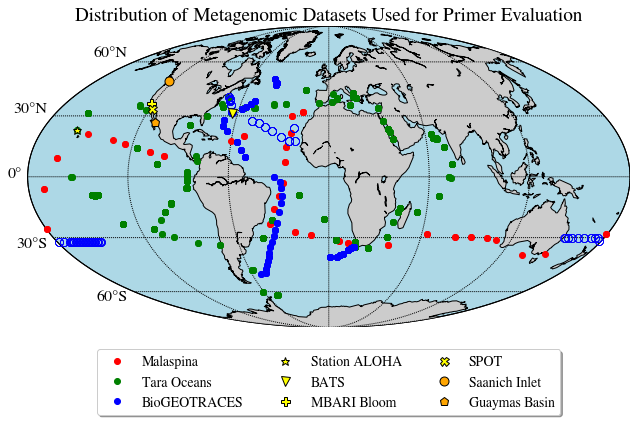

In [205]:
#Hack to fix missing PROJ4 env var
#https://github.com/conda-forge/basemap-feedstock/issues/30#issuecomment-423512069
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

#map code taken from: https://makersportal.com/blog/2018/7/20/geographic-mapping-from-a-csv-file-using-python-and-basemap
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
import numpy as np
import csv

# setting parameters for title and axes
#helveticafont = {'fontname':'Helvetica'}
font = {'family':'serif',
        'serif':['FreeSerif'], 'size' : 16}

#font = {'family' : 'serif',
#        'size'   : 16}
matplotlib.rc('font', **font)
#plt.rc('font',family='Times New Roman')

fig, ax = plt.subplots(figsize=(12,7))
plt.title("Distribution of Metagenomic Datasets Used for Primer Evaluation")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='moll',lon_0=0,resolution='c')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='#CCCCCC',lake_color='lightblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='lightblue')

with open('Malaspina-media-5.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        lat = float(data['Latitude'])
        lon = float(data['Longitude'])
        x,y = m(lon,lat)
        plt.plot(x,y,marker='o',markersize=6, color="red")
    plt.plot(x,y,marker='o',markersize=6, color="red", label="Malaspina", linestyle="None")
        
with open('TARAlt3uM_MGPrimerEval_samples.grepped.header-added.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        names.append(data['Sample ID (TARA_barcode#, registered at ...)'])
        lat = float(data['Latitude'])
        lon = float(data['Longitude'])
        x,y = m(lon,lat)
        plt.plot(x,y,marker='o',markersize=6, color="green")
    plt.plot(x,y,marker='o',markersize=6, color="green", label="Tara Oceans", linestyle="None")
        
with open('Table_3_bioGEOTRACES.sorted.clean.metadata-GA03-GP13.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        lat = float(data['Latitude [degrees_north]'])
        lon = float(data['Longitude [degrees_east]'])
        x,y = m(lon,lat)
        plt.plot(x,y,marker='o',markersize=8, markerfacecolor='none', markeredgecolor="blue", markeredgewidth=0.5)
    #plt.plot(x,y,marker='o',markersize=6, color="blue", label="BioGEOTRACES", linestyle="None", mec="black")
    
with open('Table_3_bioGEOTRACES.sorted.clean.metadata-others.tsv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='\t')
    for data in reader:
        lat = float(data['Latitude [degrees_north]'])
        lon = float(data['Longitude [degrees_east]'])
        x,y = m(lon,lat)
        plt.plot(x,y,marker='o',markersize=6, color="blue")
    plt.plot(x,y,marker='o',markersize=6, color="blue", label="BioGEOTRACES", linestyle="None")
        
lat = float("22.75")
lon = float("202")
x,y = m(lon,lat)
plt.plot(x,y,marker='*',markersize=9, label="Station ALOHA", linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)

lat = float("31.666667")
lon = float(360-64.166667)
x,y = m(lon,lat)
plt.plot(x,y,marker='v',markersize=9, label="BATS", linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)

lat = float("36.835")
lon = float(360-121.901)
x,y = m(lon,lat)
plt.plot(x,y,marker='P',markersize=9, label="MBARI Bloom", linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)
lat = float("33.55")
lon = float(360-118.4)
x,y = m(lon,lat)
plt.plot(x,y,marker='X',markersize=9, label="SPOT", linestyle="None", markerfacecolor='yellow', markeredgecolor="black", markeredgewidth=1.0)

lat = float("48.6488")
lon = float(360-123.5043)
x,y = m(lon,lat)
plt.plot(x,y,marker='o',markersize=9, label="Saanich Inlet", linestyle="None", markerfacecolor='orange', markeredgecolor="black", markeredgewidth=1.0)

lat = float("27")
lon = float(360-111.415556)
x,y = m(lon,lat)
plt.plot(x,y,marker='p',markersize=9, label="Guaymas Basin", linestyle="None", markerfacecolor='orange', markeredgecolor="black", markeredgewidth=1.0)

#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3, fontsize=14)
        
# save the figure and show it
plt.savefig('MGPrimerEval-sample-distribution.pdf', format='pdf', dpi=500,transparent=True)
plt.show()

In [168]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))